<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/sunilthite/cat-or-dog-image-classification/data

<h2>Image Preprocessing & EDA</h2>

In [1]:
import cv2
import os
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
import joblib
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

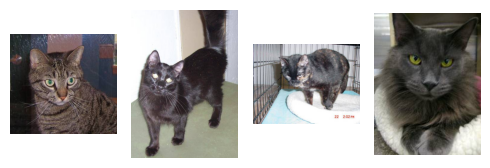

In [2]:
image_folder = 'Dataset/Cats and Dogs/Train/Cat'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg'))]

indices = [1, 223, 853, 3675] 
images = [cv2.imread(image_files[i]) for i in indices if i < len(image_files)]

fig, axes = plt.subplots(1, 4, figsize=(5, 5))
for ax, img, idx in zip(axes, images, indices):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()   
plt.show();

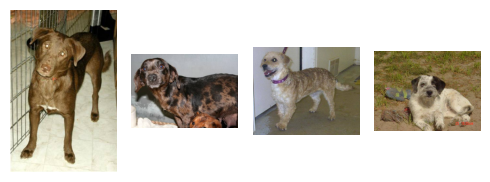

In [3]:
image_folder = 'Dataset/Cats and Dogs/Train/Dog'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg'))]

indices = [1, 223, 853, 3675] 
images = [cv2.imread(image_files[i]) for i in indices if i < len(image_files)]

fig, axes = plt.subplots(1, 4, figsize=(5, 5))
for ax, img, idx in zip(axes, images, indices):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()   
plt.show();

In [4]:
def preprocess_image(image_path, size=(128,128)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3, 3), 0) 
    img = exposure.equalize_adapthist(img)  # CLAHE
    img = img.astype('float32')
    return img

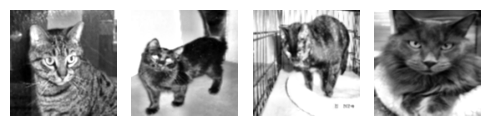

In [5]:
image_folder = 'Dataset/Cats and Dogs/Train/Cat'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg'))]

indices = [1, 223, 853, 3675] 
images = [preprocess_image(image_files[i]) for i in indices if i < len(image_files)]

fig, axes = plt.subplots(1, 4, figsize=(5, 5)) 
for ax, img, idx in zip(axes, images, indices):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout() 
plt.show();

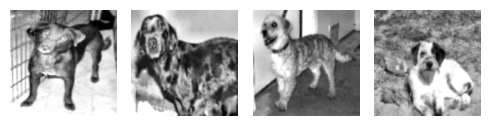

In [6]:
image_folder = 'Dataset/Cats and Dogs/Train/Dog'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg'))]

indices = [1, 223, 853, 3675] 
images = [preprocess_image(image_files[i]) for i in indices if i < len(image_files)]

fig, axes = plt.subplots(1, 4, figsize=(5, 5)) 
for ax, img, idx in zip(axes, images, indices):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout() 
plt.show();

In [7]:
def extract_hog_images(img):
    hog_features, hog_image = hog(img, pixels_per_cell=(8,8), cells_per_block=(2,2),
                                   visualize=True, feature_vector=True)
    return hog_image 

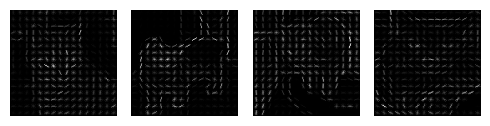

In [8]:
image_folder = 'Dataset/Cats and Dogs/Train/Cat'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg'))]

indices = [1, 223, 853, 3675] 
images = [extract_hog_images(preprocess_image(image_files[i])) for i in indices if i < len(image_files)]

fig, axes = plt.subplots(1, 4, figsize=(5, 5)) 
for ax, img, idx in zip(axes, images, indices):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout() 
plt.show();

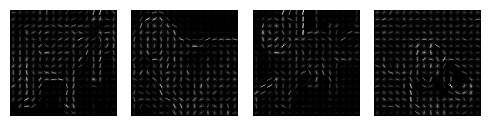

In [9]:
image_folder = 'Dataset/Cats and Dogs/Train/Dog'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg'))]

indices = [1, 223, 853, 3675] 
images = [extract_hog_images(preprocess_image(image_files[i])) for i in indices if i < len(image_files)]

fig, axes = plt.subplots(1, 4, figsize=(5, 5)) 
for ax, img, idx in zip(axes, images, indices):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.tight_layout() 
plt.show();

In [10]:
def extract_hog_features(img):
    hog_features, hog_image = hog(img, pixels_per_cell=(8,8), cells_per_block=(2,2),
                                   visualize=True, feature_vector=True)
    return hog_features

In [11]:
def extract_lbp_images(img, radius=3, n_points=None):
    if n_points is None:
        n_points = 16 * radius
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    
    return lbp, hist

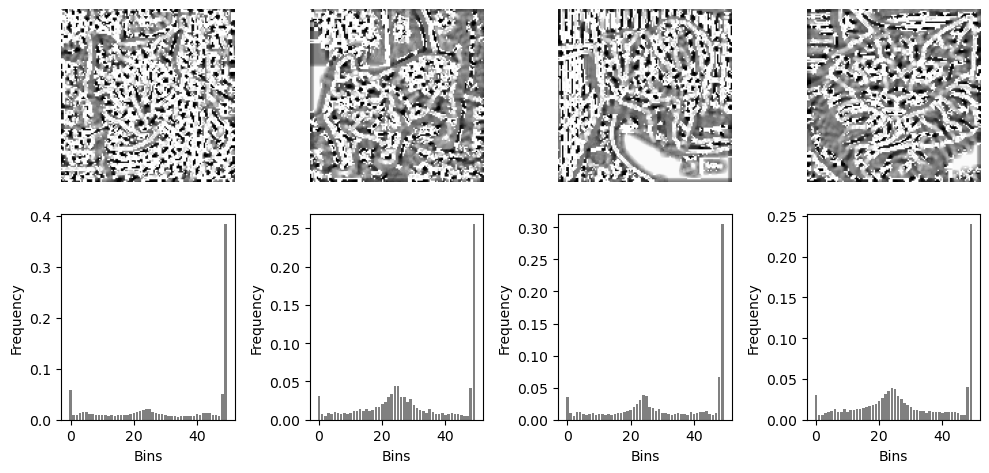

In [12]:
image_folder = 'Dataset/Cats and Dogs/Train/Cat'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg'))]

indices = [1, 223, 853, 3675] 
images = [extract_lbp_images(preprocess_image(image_files[i])) for i in indices if i < len(image_files)]

fig, axes = plt.subplots(2, 4, figsize=(10, 5)) 

for i, (lbp_img, hist), idx in zip(range(4), images, indices):  
    # Display the LBP image
    axes[0, i].imshow(lbp_img, cmap='gray')
    axes[0, i].axis('off')

    # Display the histogram
    axes[1, i].bar(range(len(hist)), hist, color='gray')
    axes[1, i].set_xlabel("Bins")
    axes[1, i].set_ylabel("Frequency")

plt.tight_layout()
plt.show();

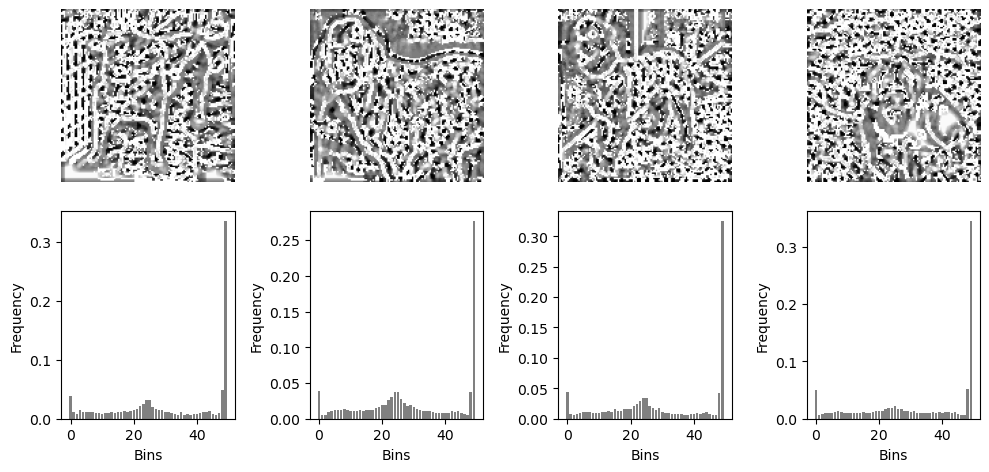

In [13]:
image_folder = 'Dataset/Cats and Dogs/Train/Dog'
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg'))]

indices = [1, 223, 853, 3675] 
images = [extract_lbp_images(preprocess_image(image_files[i])) for i in indices if i < len(image_files)]

fig, axes = plt.subplots(2, 4, figsize=(10, 5)) 

for i, (lbp_img, hist), idx in zip(range(4), images, indices):  
    # Display the LBP image
    axes[0, i].imshow(lbp_img, cmap='gray')
    axes[0, i].axis('off')

    # Display the histogram
    axes[1, i].bar(range(len(hist)), hist, color='gray')
    axes[1, i].set_xlabel("Bins")
    axes[1, i].set_ylabel("Frequency")

plt.tight_layout()
plt.show();

In [14]:
def extract_lbp_features(img, radius=3, n_points=None):
    if n_points is None:
        n_points = 16 * radius
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density=True)
    return hist

In [15]:
def get_limited_images(folder_path, limit):
    img_files = os.listdir(folder_path)
    random.shuffle(img_files)  # shuffle
    selected_files = img_files[:limit]
    return selected_files

In [16]:
X_train, y_train = [], []
for label, folder in enumerate(['Cat', 'Dog']):
    folder_path = f'Dataset/Cats and Dogs/Train/{folder}'
    selected_files = get_limited_images(folder_path, 2000)
    for img_name in selected_files:
        img_path = os.path.join(folder_path, img_name)
        img = preprocess_image(img_path)
        hog_features = extract_hog_features(img)
        lbp_features = extract_lbp_features(img)
        combined_features = np.concatenate([hog_features, lbp_features])
        X_train.append(combined_features)
        y_train.append(label)

In [17]:
X_test, y_test = [], []
for label, folder in enumerate(['Cat', 'Dog']):
    folder_path = f'Dataset/Cats and Dogs/Test/{folder}'
    selected_files = get_limited_images(folder_path, 500)
    for img_name in selected_files:
        img_path = os.path.join(folder_path, img_name)
        img = preprocess_image(img_path)
        hog_features = extract_hog_features(img)
        lbp_features = extract_lbp_features(img)
        combined_features = np.concatenate([hog_features, lbp_features])
        X_test.append(combined_features)
        y_test.append(label)

In [18]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [19]:
print(X_train.shape) 
print(X_test.shape)  

(4000, 8150)
(1000, 8150)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2>Machine Learning</h2>

In [21]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
acc_train = rf.score(X_train, y_train)

y_pred = rf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(f'Training Accuracy: {acc_train}')
print(f'Test Accuracy: {acc_test}')
print(classification_report(y_test, y_pred))

Training Accuracy: 1.0
Test Accuracy: 0.736
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       500
           1       0.78      0.66      0.71       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.73      1000
weighted avg       0.74      0.74      0.73      1000



In [22]:
# Save the ML model
joblib.dump(rf, 'ML_model.pkl')
print("ML model saved successfully!")

ML model saved successfully!


<h2>Deep Learning</h2>

In [23]:
X_train, y_train = [], []
for label, folder in enumerate(['Cat', 'Dog']):
    folder_path = f'Dataset/Cats and Dogs/Train/{folder}'
    selected_files = get_limited_images(folder_path, 2000)
    for img_name in selected_files:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128)) 
        img = img.astype('float32') / 255.0 
        X_train.append(img)
        y_train.append(label)

In [24]:
X_test, y_test = [], []
for label, folder in enumerate(['Cat', 'Dog']):
    folder_path = f'Dataset/Cats and Dogs/Test/{folder}'
    selected_files = get_limited_images(folder_path, 500)
    for img_name in selected_files:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128)) 
        img = img.astype('float32') / 255.0  
        X_test.append(img)
        y_test.append(label)

In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [26]:
print(X_train.shape) 
print(X_test.shape) 

(4000, 128, 128, 3)
(1000, 128, 128, 3)


In [27]:
CNN_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = CNN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16, callbacks=[early_stopping])

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 876s 3s/step - accuracy: 0.5285 - loss: 0.6990 - val_accuracy: 0.6530 - val_loss: 0.6285
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 902s 4s/step - accuracy: 0.6841 - loss: 0.6108 - val_accuracy: 0.7120 - val_loss: 0.5623
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 874s 3s/step - accuracy: 0.7647 - loss: 0.5211 - val_accuracy: 0.7330 - val_loss: 0.5447
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 875s 4s/step - accuracy: 0.7949 - loss: 0.4668 - val_accuracy: 0.7530 - val_loss: 0.5195
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 892s 4s/step - accuracy: 0.8073 - loss: 0.4262 - val_accuracy: 0.7540 - val_loss: 0.4972
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 909s 4s/step - accuracy: 0.8443 - loss: 0.3619 - val_accuracy: 0.7690 - val_loss: 0.5085
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 880s 4s/step - accuracy: 0.8633 - loss: 0.3195 - val_accuracy: 0.7660 - val_loss: 0.5196
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 885s 4s/step - accuracy: 0.8892 - loss: 0.2682 - val_accu

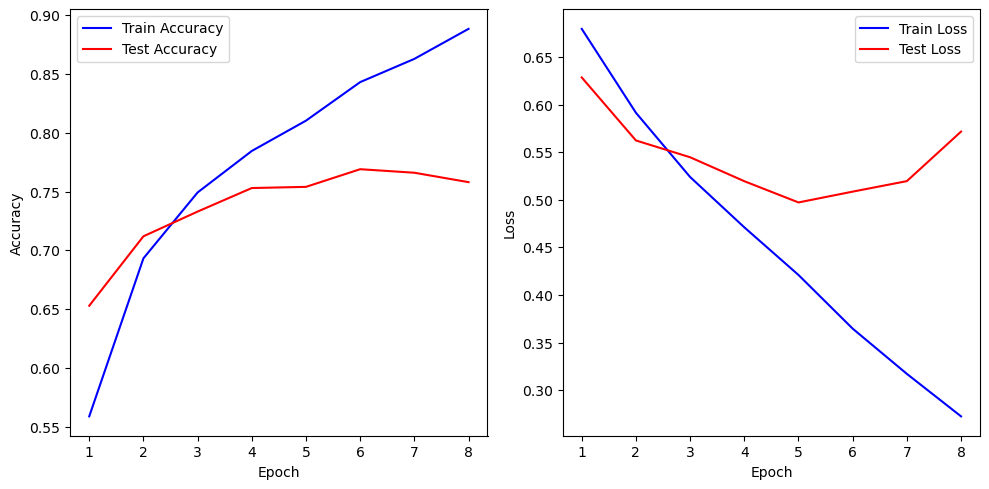

In [28]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [45]:
pred = CNN_model.predict(X_test, verbose=0)

# Decide based on final layer
if CNN_model.output_shape[-1] == 1:  # sigmoid
    y_pred = (pred > 0.5).astype(int).flatten()
else:  # softmax
    y_pred = np.argmax(pred, axis=1)

In [47]:
cr_CNN = classification_report(y_test, y_pred)
print(cr_CNN)

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       500
           1       0.75      0.76      0.75       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



In [48]:
# Save the DL model
CNN_model.save('CNN_model.keras')
print("CNN model saved successfully!")

CNN model saved successfully!


<h2>Machine Learning vs Deep Learning</h2>

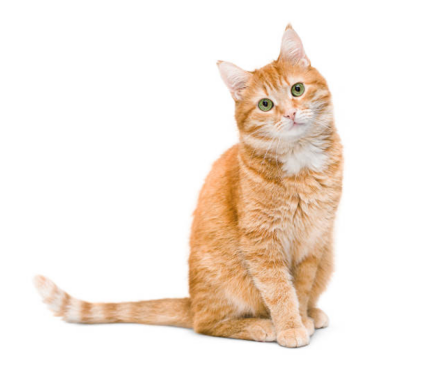

ML Predicted class: Dog
CNN Predicted class: Cat


In [59]:
# Load and preprocess image
img_path = 'cat.jpg'

# Plot the image
img_rgb = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off') 
plt.show();

# === For ML model ===
img = preprocess_image(img_path)
hog_features = extract_hog_features(img)
lbp_features = extract_lbp_features(img)
combined_features = np.concatenate([hog_features, lbp_features])
combined_features = combined_features.reshape(1, -1)

ML_model = joblib.load('ML_model.pkl')
ML_pred = ML_model.predict(combined_features)[0]
if ML_pred == 0:
    print("ML Predicted class: Cat")
elif ML_pred == 1:
    print("ML Predicted class: Dog")


# === For CNN ===
img_cnn = cv2.imread(img_path)
img_cnn = cv2.resize(img_cnn, (128, 128))
img_cnn = img_cnn.astype('float32') / 255.0
img_cnn = np.expand_dims(img_cnn, axis=0)

cnn_output = CNN_model.predict(img_cnn, verbose=0)

if CNN_model.output_shape[-1] == 1:  # sigmoid
    CNN_pred = int(cnn_output[0][0] > 0.5)
else:  # softmax
    CNN_pred = np.argmax(cnn_output, axis=1)[0]

if CNN_pred == 0:
    print("CNN Predicted class: Cat")
elif CNN_pred == 1:
    print("CNN Predicted class: Dog")

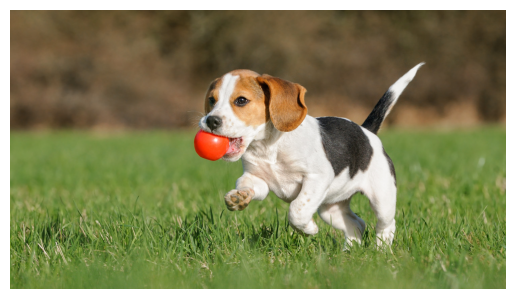

ML Predicted class: Dog
CNN Predicted class: Dog


In [53]:
# Load and preprocess image
img_path = 'dog.png'

# Plot the image
img_rgb = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off') 
plt.show();

# === For ML model ===
img = preprocess_image(img_path)
hog_features = extract_hog_features(img)
lbp_features = extract_lbp_features(img)
combined_features = np.concatenate([hog_features, lbp_features])
combined_features = combined_features.reshape(1, -1)

ML_model = joblib.load('ML_model.pkl')
ML_pred = ML_model.predict(combined_features)[0]
if ML_pred == 0:
    print("ML Predicted class: Cat")
elif ML_pred == 1:
    print("ML Predicted class: Dog")


# === For CNN ===
img_cnn = cv2.imread(img_path)
img_cnn = cv2.resize(img_cnn, (128, 128))
img_cnn = img_cnn.astype('float32') / 255.0
img_cnn = np.expand_dims(img_cnn, axis=0)

cnn_output = CNN_model.predict(img_cnn, verbose=0)

if CNN_model.output_shape[-1] == 1:  # sigmoid
    CNN_pred = int(cnn_output[0][0] > 0.5)
else:  # softmax
    CNN_pred = np.argmax(cnn_output, axis=1)[0]

if CNN_pred == 0:
    print("CNN Predicted class: Cat")
elif CNN_pred == 1:
    print("CNN Predicted class: Dog")